In [ ]:
Aim:To learn about
    1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset
    2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recallon the given dataset.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [70]:
data_set_name=sns.get_dataset_names()
print(data_set_name)


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [72]:
df=sns.load_dataset("iris")


In [74]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [76]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [78]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [80]:
df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [82]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [84]:
df["species"].value_counts(normalize=True)

species
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64

In [86]:
# Check for null values in the dataset
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
# Define features (X) and target (Y)
X = data.drop('species', axis=1)
y = data['species']

In [9]:
# Split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [88]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [90]:
y_train

81     versicolor
133     virginica
137     virginica
75     versicolor
109     virginica
          ...    
71     versicolor
106     virginica
14         setosa
92     versicolor
102     virginica
Name: species, Length: 105, dtype: object

In [92]:
 X_test

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [94]:
y_test

73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
31         setosa
64     versicolor
141     virginica
68     versicolor
82     versicolor
110     virginica
12         setosa
36         setosa
9          setosa
19         setosa
56     versicolor
104     virginica
69     versicolor
55     versicolor
132     virginica
29         setosa
127     virginica
26         setosa
128     virginica
131     virginica
145     virginica
108     virginica
143     virginica
45         setosa
30         setosa
22         setosa
15         setosa
65     versicolor
11         setosa
42         setosa
146     virginica
51     versicolor
27         setosa
4          setosa
32         setosa
142     virginica
85     versicolor
86     versicolor
16         setosa
10         setosa
Name: species, dtype: object

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler

MinMaxScaler()

In [100]:
X_train_scaled=scaler.fit_transform(X_train)
X_train_scaled

array([[0.35294118, 0.18181818, 0.46428571, 0.375     ],
       [0.58823529, 0.36363636, 0.71428571, 0.58333333],
       [0.61764706, 0.5       , 0.78571429, 0.70833333],
       [0.67647059, 0.45454545, 0.58928571, 0.54166667],
       [0.85294118, 0.72727273, 0.89285714, 1.        ],
       [0.41176471, 0.40909091, 0.55357143, 0.5       ],
       [0.97058824, 0.45454545, 0.98214286, 0.83333333],
       [0.38235294, 0.45454545, 0.60714286, 0.58333333],
       [0.23529412, 0.68181818, 0.05357143, 0.04166667],
       [1.        , 0.36363636, 1.        , 0.79166667],
       [0.44117647, 0.31818182, 0.53571429, 0.375     ],
       [0.26470588, 0.63636364, 0.05357143, 0.04166667],
       [0.20588235, 0.68181818, 0.03571429, 0.08333333],
       [0.23529412, 0.81818182, 0.14285714, 0.125     ],
       [0.20588235, 0.        , 0.42857143, 0.375     ],
       [0.58823529, 0.31818182, 0.67857143, 0.70833333],
       [0.14705882, 0.63636364, 0.14285714, 0.04166667],
       [0.20588235, 0.45454545,

In [10]:
# Import and instantiate GaussianNB model
gaussian = GaussianNB()

# Fit the model with training data
gaussian.fit(X_train, y_train)

GaussianNB()

In [12]:
# Predict on test data
y_pred = gaussian.predict(X_test)

# Show predictions
y_pred[:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype='<U10')

In [13]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.98
Precision: 0.98
Recall: 0.98


In [21]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


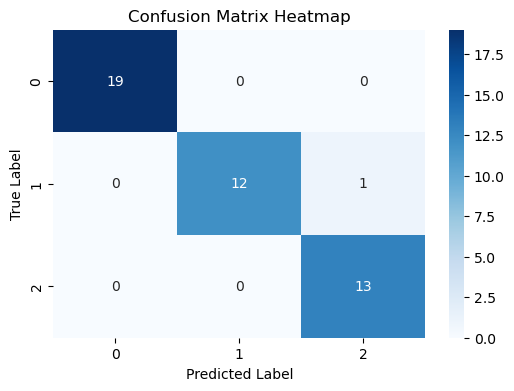

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [25]:
from sklearn.metrics import classification_report

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



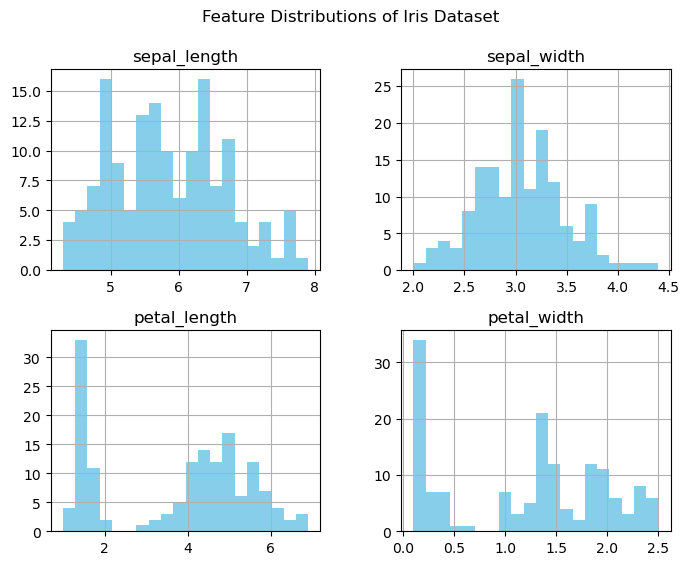

In [27]:
# Plot feature distributions
data.hist(figsize=(8, 6), bins=20, color='skyblue')
plt.suptitle('Feature Distributions of Iris Dataset')
plt.show()

In [29]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(gaussian, X, y, cv=5)

# Print average accuracy
print(f"Average Accuracy using Cross-Validation: {cv_scores.mean():.2f}")

Average Accuracy using Cross-Validation: 0.95


In [31]:
FP=cm.sum(axis=0)-np.diag(cm)
FN=cm.sum(axis=1)-np.diag(cm)
TP=np.diag(cm)
TN=cm.sum()-(FP+FN+TP)
cm_values=TP,FP,FN,TN

In [33]:
df = pd.DataFrame(data=cm_values, columns=['setosa', 'versicolor', 'virginica'])
df

,setosa,versicolor,virginica
0,19,12,13
1,0,0,1
2,0,1,0
3,26,32,31


In [ ]:
Name :Siddhi Kakade
Roll No:13214